\newpage


1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

In [56]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

In [57]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

The data contains several binary variables and we use the class variable that indicates whether the patient has chronic kidney disease or not as the target variable. Then we use the rest of 24 features to conduct the classification that classifies patients into two target groups.

2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [58]:
X1 = X.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder
Binary_var = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

encoder = LabelEncoder()
for var in Binary_var:
    X1[var] = encoder.fit_transform(X[var])
y = y.replace('ckd\t','ckd')
y = pd.DataFrame(encoder.fit_transform(y))

/Users/dingqian/Desktop/3da/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Dataset Overview: Provide a detailed description of the dataset, covering variables, sum- maries, observation counts, data types, and distributions (at least three statements).

In [60]:
print(X1.info())
print(X1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [61]:
print(y.info())
print(y.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None
                0
count  400.000000
mean     0.375000
std      0.484729
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


There are 400 samples in the data set. Among 24 feature variables, 10 of them are binary variables and target variable is binary variable, too. Due to the existence of missing value, the observation counts for each variable are not all 400.

4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

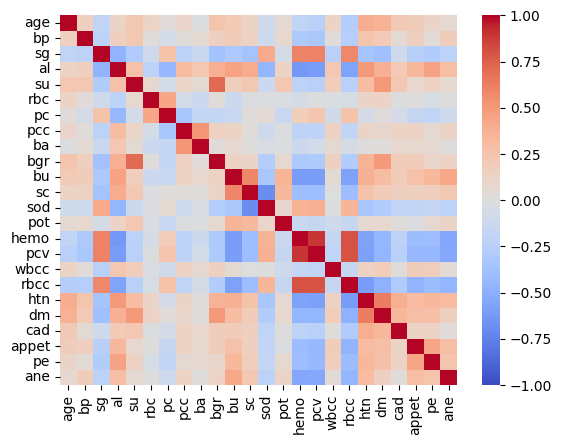

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

Corr = X1.corr()
sns.heatmap(Corr, annot=False, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

According to the heatmap, we can see that some variables have moderately high correlation e.g. sod and sc. The exsitence of high correlation implies that we can use some dimension reduction method to lower the correlation between the features. We can also see that majority variables do not have high correlation with each other.

5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [63]:
Feature = X1.columns.to_list()
Continuous_var = [x for x in Feature if x not in Binary_var]
for var in Continuous_var:
    X1[var] = X[var].fillna(X[var].mean())

I address the missing value by filling the NaN value by sample mean for continuous vairables. For Binary variable, since we have transform them in second question, we do not fill them again.


6. Outlier Analysis: Implement your approach for identifying and managing outliers, or pro- vide reasons for not addressing them.

In [64]:
from scipy.stats.mstats import winsorize

outlier_var = ['bp', 'bgr', 'wbcc', 'bu', 'sc', 'sod', 'pot']
for var in outlier_var:
    X1[var] = winsorize(X1[var], limits=[0.05, 0.05])

I identify the outliers by refering to the statistical description. If there is any outlier, then the max or min value would be extremely large or small relative to 75% or 25% quantiles or exceed 3 sigma interval. By checking the statistical data, we find that bp, bgr, wbcc, bu, sc, sod, pot exist outliers. 

7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

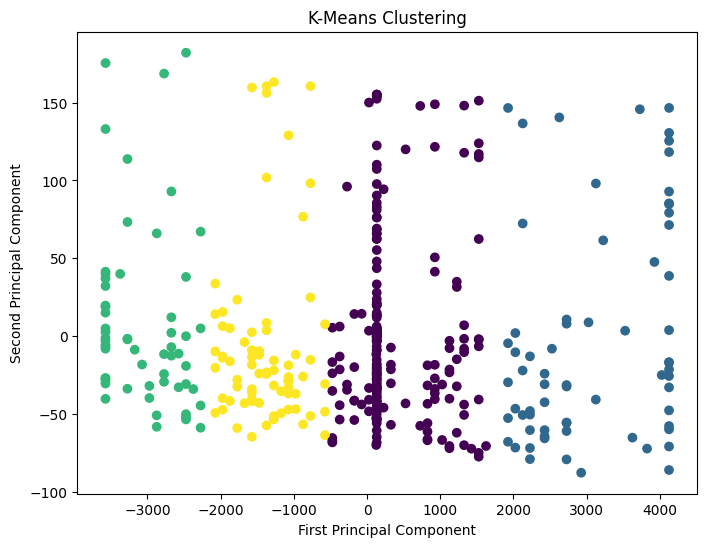

In [65]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Kmeans = KMeans(n_clusters=4, n_init=10)
Kmeans.fit(X1)
labels = Kmeans.labels_

PCA_method = PCA(n_components=8)
X1_PCA = PCA_method.fit_transform(X1)
plt.figure(figsize=(8, 6))
plt.scatter(X1_PCA[:, 0], X1_PCA[:, 1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering')
plt.show()


8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X1, y, test_size=0.3, random_state=1)

9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)

/Users/dingqian/Desktop/3da/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

The methods I choose are decision tree and SVM. These two methods are frequently used in classification tasks and they have the advantage of easy interpretation.

10. Performance Metrics: Outline the two metrics for comparing the performance of the
classifiers.


I use accuracy and F1 score as the performance metrics. Accuracy evaluate the accuracy of the classification result while F1 score combines precision and recall into a single metric, making it useful for evaluating models when there's an imbalanced sample.


11. Feature Selection/Extraction: Implement methods to enhance the performance of at least
one classifier in (9). The answer for this question can be included in (12).

In [68]:
PCA_ = PCA(n_components=8)
X_train_PCA = PCA_.fit_transform(X_train)
X_test_PCA = PCA_.transform(X_test)

I use the PCA to make the feature extraction. We first perform PCA on the data and then use the scree plot to determine the number of principle components into the model.

12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the
test set. Discuss your findings (at least two statements).

In [69]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_DT = DT.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)

In [70]:
DT_enhanced = DecisionTreeClassifier()
DT_enhanced.fit(X_train_PCA, y_train)
y_pred_DTe = DT_enhanced.predict(X_test_PCA)
acc_DT1 = accuracy_score(y_test, y_pred_DTe)
f1_DT1 = f1_score(y_test, y_pred_DTe)

In [71]:
print("DT Accuracy:", acc_DT)
print("DT F1:", f1_DT)
print("SVM Accuracy:", acc_SVM)
print("SVM F1:", f1_SVM)
print("DTe Accuracy:", acc_DT1)
print("DTe F1:", f1_DT1)

DT Accuracy: 0.975
DT F1: 0.9696969696969697
SVM Accuracy: 0.9666666666666667
SVM F1: 0.9615384615384615
DTe Accuracy: 0.9083333333333333
DTe F1: 0.888888888888889


The result shows that the dimension reduction method does not perform better on this data set. It may due to the difference between train and test are small. We also find that SVM performs better than DT tree, it may due to that the data is linearly separable. This can be verified when we do the feature clustering.

13. Interpretable Classifier Insight: After re-training the interpretable classifier with all
available data, analyze and interpret the significance of predictor variables in the context of
the data and the challenge (at least two statements).

In [72]:
DT.fit(X1, y)
importance = DT.feature_importances_
importance_feature = pd.DataFrame({
    'feature': Feature,
    'importance': importance
}, columns=['feature', 'importance'])
importance_feature

,feature,importance
0,age,0.000000
1,bp,0.000000
2,sg,0.172346
3,al,0.020742
4,su,0.000000
5,rbc,0.000000
6,pc,0.000000
7,pcc,0.000000
8,ba,0.000000
9,bgr,0.014222


From the importance score I find that there are only several features important in Decision Tree model when spliting the nodes. The challenge is that the information in the rest of the features are not fully used.

15. Team Contributions: Document each team member’s specific contributions related to the
questions above.

I finish the homework individually.